# Analyse Exploratoire

A réaliser : 
- Une analyse descriptive des données, y compris une explication du sens des colonnes gardées, des arguments derrière la suppression de lignes ou de colonnes, des statistiques descriptives et des visualisations pertinentes.

## Import des modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
bc_csv = pd.read_csv("data/2016_Building_Energy_Benchmarking.csv")
print(f"Dataset initial : {len(bc_csv)} bâtiments, {bc_csv.shape[1]} colonnes")

Dataset initial : 3376 bâtiments, 46 colonnes


In [3]:
# On regarde comment un batiment est défini dans ce jeu de données 
bc_csv.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,...,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,...,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,...,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88


Variables identifiées par catégories :  
- Identification :  
    OSEBuildingID, PropertyName, Address, City, State, ZipCode, TaxParcelIdentificationNumber
- Géolocalisation :   
    Latitude, Longitude, Neighborhood, CouncilDistrictCode  
- Caractéristiques physiques :   
    YearBuilt, NumberofFloors, NumberofBuildings,PropertyGFATotal, PropertyGFABuilding(s),PropertyGFAParking, LargestPropertyUseTypeGFA, SecondLargestPropertyUseTypeGFA, ThirdLargestPropertyUseTypeGFA
- Usage :   
    BuildingType, PrimaryPropertyType, ListOfAllPropertyUseTypes, LargestPropertyUseType, SecondLargestPropertyUseType, ThirdLargestPropertyUseType, ComplianceStatus, Outlier
- Performance énergétique :   
    YearsENERGYSTARCertified, ENERGYSTARScore, SiteEUI(kBtu/sf), SiteEUIWN(kBtu/sf), SourceEUI(kBtu/sf), SourceEUIWN(kBtu/sf)
- Consommation :   
    DataYear, SiteEnergyUse(kBtu), SiteEnergyUseWN(kBtu), Electricity(kWh) , Electricity(kBtu), NaturalGas(therms), NaturalGas(kBtu), SteamUse(kBtu)  
- Émissions :   
    TotalGHGEmissions, GHGEmissionsIntensity 
- Autres

## Suppression de champs inutiles

In [4]:
bc_csv.drop(columns=['OSEBuildingID', 'PropertyName', 'Address', 'City', 'State', 'ZipCode', 'TaxParcelIdentificationNumber'], inplace=True)

## Traitements des outliers déclarés

In [5]:
mask = bc_csv['Outlier'].notna()
bc_csv[mask]

,DataYear,BuildingType,PrimaryPropertyType,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
226,2016,NonResidential,Large Office,7,DOWNTOWN,47.60642,-122.33581,1958,1.0,6,...,1.166315e+07,39794668.0,16048.309570,1604831.0,False,NaN,Non-Compliant,High outlier,362.66,2.10
384,2016,NonResidential,Retail Store,4,NORTHEAST,47.66178,-122.31812,1987,1.0,2,...,9.348260e+04,318963.0,0.000000,0.0,False,NaN,Non-Compliant,Low outlier,2.22,0.03
448,2016,NonResidential,Large Office,2,DOWNTOWN,47.59878,-122.33458,1913,5.0,7,...,4.715030e+05,1608768.0,3430.500488,343050.0,False,NaN,Non-Compliant,Low outlier,29.43,0.19
517,2016,NonResidential,Large Office,7,MAGNOLIA / QUEEN ANNE,47.62235,-122.36378,2000,1.0,4,...,7.953454e+06,27137187.0,0.000000,0.0,False,NaN,Non-Compliant,High outlier,189.18,1.46
720,2016,Multifamily HR (10+),High-Rise Multifamily,7,DOWNTOWN,47.61706,-122.35141,1982,1.0,24,...,6.265616e+05,2137828.0,2700.760010,270076.0,False,NaN,Non-Compliant,Low outlier,29.25,0.17
834,2016,Multifamily LR (1-4),Low-Rise Multifamily,3,EAST,47.62059,-122.32440,1989,1.0,4,...,7.502090e+04,255971.0,0.000000,0.0,False,NaN,Non-Compliant,Low outlier,1.78,0.06
839,2016,SPS-District K-12,K-12 School,7,MAGNOLIA / QUEEN ANNE,47.63203,-122.35337,2001,1.0,1,...,7.228240e+04,246628.0,1848.439575,184844.0,True,NaN,Error - Correct Default Data,Low outlier,11.54,0.32
962,2016,Multifamily LR (1-4),Low-Rise Multifamily,1,SOUTHWEST,47.58143,-122.37510,1990,1.0,3,...,2.058855e+05,702481.0,0.000000,0.0,False,NaN,Non-Compliant,Low outlier,4.90,0.07
1045,2016,NonResidential,Retail Store,2,GREATER DUWAMISH,47.56535,-122.34054,1953,1.0,1,...,1.436250e+04,49005.0,964.640015,96464.0,True,NaN,Error - Correct Default Data,Low outlier,5.46,0.14
1229,2016,NonResidential,Small- and Mid-Sized Office,7,DOWNTOWN,47.61119,-122.33581,1903,1.0,3,...,7.064900e+03,24105.0,0.000000,0.0,False,NaN,Non-Compliant,Low outlier,0.17,0.00


In [6]:
# Tous sont non-compliant concernant la conformité aux normes de relevés énergétiques - Nous les éliminons
bc_without_outliers = bc_csv[~mask].copy()
print(f"Après filtrage des outliers déclarés : {len(bc_csv)} → {len(bc_without_outliers)} bâtiments")

Après filtrage des outliers déclarés : 3376 → 3344 bâtiments


## Traitement des usages
### Affichage des usages utilisés

In [7]:
use_types = []
for i,row in bc_without_outliers.iterrows():
    if not pd.isna(row['ListOfAllPropertyUseTypes']):
        for use in row['ListOfAllPropertyUseTypes'].split(','):
            use =  use.strip()
            if use not in use_types:
                use_types.append(use)
                print(use)
print(f"{len(use_types)} éléments") 

Hotel
Parking
Restaurant
Swimming Pool
Police Station
Other - Entertainment/Public Assembly
Multifamily Housing
Data Center
Library
Fitness Center/Health Club/Gym
Office
Other
Other - Lodging/Residential
Social/Meeting Hall
Courthouse
K-12 School
College/University
Automobile Dealership
Retail Store
Self-Storage Facility
Energy/Power Station
Laboratory
Manufacturing/Industrial Plant
Non-Refrigerated Warehouse
Refrigerated Warehouse
Other - Education
Vocational School
Other - Mall
Personal Services (Health/Beauty
Dry Cleaning
etc)
Senior Care Community
Medical Office
Distribution Center
Hospital (General Medical & Surgical)
Museum
Repair Services (Vehicle
Shoe
Locksmith
Food Service
Residence Hall/Dormitory
Other - Services
Other/Specialty Hospital
Financial Office
Other - Utility
Fast Food Restaurant
Movie Theater
Supermarket/Grocery Store
Worship Facility
Lifestyle Center
Other - Recreation
Convenience Store without Gas Station
Pre-school/Daycare
Food Sales
Other - Restaurant/Bar
Sing

### Vérification de l'usage principal d'habitation

In [8]:
# Let's check property without largest use type
mask = bc_without_outliers['LargestPropertyUseType'].isna()
bc_without_outliers[mask][['ListOfAllPropertyUseTypes','BuildingType','PrimaryPropertyType','LargestPropertyUseType']]

,ListOfAllPropertyUseTypes,BuildingType,PrimaryPropertyType,LargestPropertyUseType
353,"Fitness Center/Health Club/Gym, Office, Other ...",NonResidential,Self-Storage Facility,NaN
578,NaN,NonResidential,Small- and Mid-Sized Office,NaN
758,NaN,Multifamily LR (1-4),Low-Rise Multifamily,NaN
1077,Multifamily Housing,Multifamily HR (10+),High-Rise Multifamily,NaN
1147,Hotel,NonResidential,Hotel,NaN
1483,Multifamily Housing,Multifamily MR (5-9),Mid-Rise Multifamily,NaN
1756,Multifamily Housing,Multifamily HR (10+),High-Rise Multifamily,NaN
1768,NaN,Multifamily LR (1-4),Low-Rise Multifamily,NaN
1792,NaN,Multifamily LR (1-4),Low-Rise Multifamily,NaN
2321,NaN,Multifamily LR (1-4),Low-Rise Multifamily,NaN


### Correction manuelle des valeurs manquantes

In [9]:
mask = bc_without_outliers['LargestPropertyUseType'].isna() & bc_without_outliers['PrimaryPropertyType'].str.contains('Multifamily')
bc_without_outliers.loc[mask,'LargestPropertyUseType']= "Multifamily Housing"
mask = bc_without_outliers['LargestPropertyUseType'].isna() 
bc_without_outliers[mask][['ListOfAllPropertyUseTypes','BuildingType','PrimaryPropertyType','LargestPropertyUseType']]
bc_without_outliers.loc[mask,'LargestPropertyUseType']= bc_without_outliers.loc[mask,'PrimaryPropertyType']
mask = bc_without_outliers['ListOfAllPropertyUseTypes'].isna() 
bc_without_outliers.loc[mask,'ListOfAllPropertyUseTypes']= bc_without_outliers.loc[mask,'LargestPropertyUseType']



### Exclusion des propriétés à usage principal d'habitation (non temporaire)

In [10]:
exclude_first_use = ["Multifamily Housing", "Single Family Home","Residence Hall/Dormitory","Other - Lodging/Residential"]
mask = bc_without_outliers["LargestPropertyUseType"].isin( exclude_first_use)
bc_only_non_residential = bc_without_outliers[~mask].copy()
print(f"Après filtrage des types de propriétés : {len(bc_without_outliers)} → {len(bc_only_non_residential)} bâtiments")


Après filtrage des types de propriétés : 3344 → 1649 bâtiments


In [11]:
bc_only_non_residential['PrimaryPropertyType'].value_counts()

PrimaryPropertyType
Small- and Mid-Sized Office    290
Other                          247
Warehouse                      187
Large Office                   170
K-12 School                    137
Mixed Use Property             107
Retail Store                    89
Hotel                           76
Worship Facility                69
Distribution Center             53
Senior Care Community           45
Supermarket / Grocery Store     40
Medical Office                  39
Self-Storage Facility           28
University                      25
Refrigerated Warehouse          12
Restaurant                      12
Hospital                        10
Laboratory                      10
Office                           3
Name: count, dtype: int64

In [12]:
bc_only_non_residential['LargestPropertyUseType'].value_counts()

LargestPropertyUseType
Office                                                  492
Non-Refrigerated Warehouse                              199
K-12 School                                             137
Other                                                    99
Retail Store                                             97
Hotel                                                    77
Worship Facility                                         69
Distribution Center                                      54
Senior Care Community                                    46
Medical Office                                           41
Supermarket/Grocery Store                                41
Parking                                                  32
Other - Recreation                                       31
Self-Storage Facility                                    29
College/University                                       25
Other - Entertainment/Public Assembly                    21
Restaurant       

In [13]:
bc_only_non_residential['SecondLargestPropertyUseType'].value_counts()

SecondLargestPropertyUseType
Parking                                                 341
Office                                                  162
Retail Store                                             84
Other                                                    44
Restaurant                                               30
Non-Refrigerated Warehouse                               29
Multifamily Housing                                      17
Fitness Center/Health Club/Gym                           16
Data Center                                              12
Other - Services                                         11
Medical Office                                            8
Laboratory                                                8
Distribution Center                                       7
Bank Branch                                               7
Supermarket/Grocery Store                                 7
Other - Entertainment/Public Assembly                     6
K-12 School

In [14]:
bc_only_non_residential['ThirdLargestPropertyUseType'].value_counts()

ThirdLargestPropertyUseType
Office                                                  51
Retail Store                                            47
Parking                                                 43
Other                                                   38
Restaurant                                              31
Non-Refrigerated Warehouse                              15
Data Center                                             13
Multifamily Housing                                     12
Swimming Pool                                           10
Medical Office                                           9
Pre-school/Daycare                                       8
Food Service                                             7
Social/Meeting Hall                                      6
Bank Branch                                              5
Other - Restaurant/Bar                                   5
Other - Entertainment/Public Assembly                    4
Fitness Center/Health Club/G

In [15]:
bc_only_non_residential[['BuildingType', 'PrimaryPropertyType', 'ListOfAllPropertyUseTypes', 'LargestPropertyUseType', 'SecondLargestPropertyUseType', 'ThirdLargestPropertyUseType']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 1649 entries, 0 to 3375
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   BuildingType                  1649 non-null   object
 1   PrimaryPropertyType           1649 non-null   object
 2   ListOfAllPropertyUseTypes     1649 non-null   object
 3   LargestPropertyUseType        1649 non-null   object
 4   SecondLargestPropertyUseType  852 non-null    object
 5   ThirdLargestPropertyUseType   344 non-null    object
dtypes: object(6)
memory usage: 90.2+ KB


In [16]:
mask = (bc_only_non_residential['PrimaryPropertyType'].str.contains('Other')) &  (~ bc_only_non_residential['LargestPropertyUseType'].str.contains('Other'))
bc_only_non_residential['FirstUseType'] = bc_only_non_residential['PrimaryPropertyType']
bc_only_non_residential.loc[mask,'FirstUseType'] = bc_only_non_residential.loc[mask,'LargestPropertyUseType']

In [17]:
mask = bc_only_non_residential['FirstUseType'].isna()
bc_only_non_residential['FirstUseType'].value_counts()

FirstUseType
Small- and Mid-Sized Office                             290
Warehouse                                               187
Large Office                                            170
Other                                                   156
K-12 School                                             137
Mixed Use Property                                      107
Retail Store                                             89
Hotel                                                    76
Worship Facility                                         69
Distribution Center                                      53
Senior Care Community                                    45
Supermarket / Grocery Store                              40
Medical Office                                           39
Self-Storage Facility                                    28
University                                               25
Parking                                                  17
Restaurant                 

In [18]:
mask =  (bc_only_non_residential['SecondLargestPropertyUseType'].notna())
bc_only_non_residential['SecondLargestPropertyUseType'].value_counts()

SecondLargestPropertyUseType
Parking                                                 341
Office                                                  162
Retail Store                                             84
Other                                                    44
Restaurant                                               30
Non-Refrigerated Warehouse                               29
Multifamily Housing                                      17
Fitness Center/Health Club/Gym                           16
Data Center                                              12
Other - Services                                         11
Medical Office                                            8
Laboratory                                                8
Distribution Center                                       7
Bank Branch                                               7
Supermarket/Grocery Store                                 7
Other - Entertainment/Public Assembly                     6
K-12 School

## Traitement des valeurs candidates de consommations

In [19]:
# examen des valeurs de consommations
target_cols = ['Electricity(kBtu)',  'NaturalGas(kBtu)', 'SteamUse(kBtu)','SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)']
bc_only_non_residential[target_cols] = bc_only_non_residential[target_cols].replace(0,np.nan)
bc_with_candidates = bc_only_non_residential.dropna(subset=target_cols, how='all').copy()
print(f"Après filtrage targets vides: {len(bc_only_non_residential)} → {len(bc_with_candidates)} bâtiments")
conso_details= ['Electricity(kBtu)',  'NaturalGas(kBtu)', 'SteamUse(kBtu)']
bc_with_candidates[conso_details] = bc_with_candidates[conso_details].fillna(0)
bc_with_candidates['CalcUse(kBtu)']= bc_with_candidates[conso_details].sum(axis=1)
target_cols.append('CalcUse(kBtu)')
bc_with_candidates[target_cols].info()

Après filtrage targets vides: 1649 → 1641 bâtiments
<class 'pandas.core.frame.DataFrame'>
Index: 1641 entries, 0 to 3375
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Electricity(kBtu)      1641 non-null   float64
 1   NaturalGas(kBtu)       1641 non-null   float64
 2   SteamUse(kBtu)         1641 non-null   float64
 3   SiteEnergyUse(kBtu)    1630 non-null   float64
 4   SiteEnergyUseWN(kBtu)  1620 non-null   float64
 5   CalcUse(kBtu)          1641 non-null   float64
dtypes: float64(6)
memory usage: 89.7 KB


In [20]:
mask = ((bc_with_candidates['SiteEnergyUse(kBtu)'] == 0) | (bc_with_candidates['SiteEnergyUse(kBtu)'].isna())) & (bc_with_candidates['SiteEnergyUse(kBtu)']!=0)
bc_with_candidates.loc[mask, 'SiteEnergyUse(kBtu)'] = bc_with_candidates.loc[mask,'CalcUse(kBtu)']

In [21]:
bc_with_candidates[target_cols].info()

<class 'pandas.core.frame.DataFrame'>
Index: 1641 entries, 0 to 3375
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Electricity(kBtu)      1641 non-null   float64
 1   NaturalGas(kBtu)       1641 non-null   float64
 2   SteamUse(kBtu)         1641 non-null   float64
 3   SiteEnergyUse(kBtu)    1641 non-null   float64
 4   SiteEnergyUseWN(kBtu)  1620 non-null   float64
 5   CalcUse(kBtu)          1641 non-null   float64
dtypes: float64(6)
memory usage: 89.7 KB


In [22]:
bc_with_target = bc_with_candidates.drop(columns=['CalcUse(kBtu)', 'SiteEnergyUseWN(kBtu)']).copy()

Valeur Candidate retenue : SiteEnergyUse(kBtu)


## Traitement des caractéristiques physiques
### Traitement des surfaces

In [23]:
phy_cols = ['PropertyGFATotal', 'PropertyGFABuilding(s)','PropertyGFAParking', 'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA']
bc_with_target[phy_cols].info()

<class 'pandas.core.frame.DataFrame'>
Index: 1641 entries, 0 to 3375
Data columns (total 6 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   PropertyGFATotal                 1641 non-null   int64  
 1   PropertyGFABuilding(s)           1641 non-null   int64  
 2   PropertyGFAParking               1641 non-null   int64  
 3   LargestPropertyUseTypeGFA        1637 non-null   float64
 4   SecondLargestPropertyUseTypeGFA  850 non-null    float64
 5   ThirdLargestPropertyUseTypeGFA   344 non-null    float64
dtypes: float64(3), int64(3)
memory usage: 89.7 KB


In [24]:
# 'YearBuilt', 'NumberofFloors', 'NumberofBuildings'
bc_with_target[phy_cols].fillna(0)
bc_with_target['3LargestGFA']= bc_with_target[['LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA']].sum(axis=1)
mask = bc_with_target['3LargestGFA']==0
bc_with_target.loc[mask, '3LargestGFA']= bc_with_target.loc[mask, 'PropertyGFATotal']
corr_values = ['SiteEnergyUse(kBtu)','SiteEnergyUse(kBtu)', 'PropertyGFATotal', 'PropertyGFABuilding(s)','PropertyGFAParking', 'LargestPropertyUseTypeGFA','3LargestGFA']
bc_with_target[corr_values].corr()

,SiteEnergyUse(kBtu),SiteEnergyUse(kBtu),PropertyGFATotal,PropertyGFABuilding(s),PropertyGFAParking,LargestPropertyUseTypeGFA,3LargestGFA
SiteEnergyUse(kBtu),1.000000,1.000000,0.809844,0.826476,0.144106,0.845250,0.857504
SiteEnergyUse(kBtu),1.000000,1.000000,0.809844,0.826476,0.144106,0.845250,0.857504
PropertyGFATotal,0.809844,0.809844,1.000000,0.990217,0.379024,0.978485,0.982624
PropertyGFABuilding(s),0.826476,0.826476,0.990217,1.000000,0.246190,0.983148,0.977360
PropertyGFAParking,0.144106,0.144106,0.379024,0.246190,1.000000,0.276385,0.343594
LargestPropertyUseTypeGFA,0.845250,0.845250,0.978485,0.983148,0.276385,1.000000,0.981608
3LargestGFA,0.857504,0.857504,0.982624,0.977360,0.343594,0.981608,1.000000


In [25]:
bc_with_target['3LargestGFA'].describe()

count    1.641000e+03
mean     1.219627e+05
std      3.059045e+05
min      8.223000e+03
25%      3.017200e+04
50%      5.075900e+04
75%      1.055630e+05
max      9.320156e+06
Name: 3LargestGFA, dtype: float64

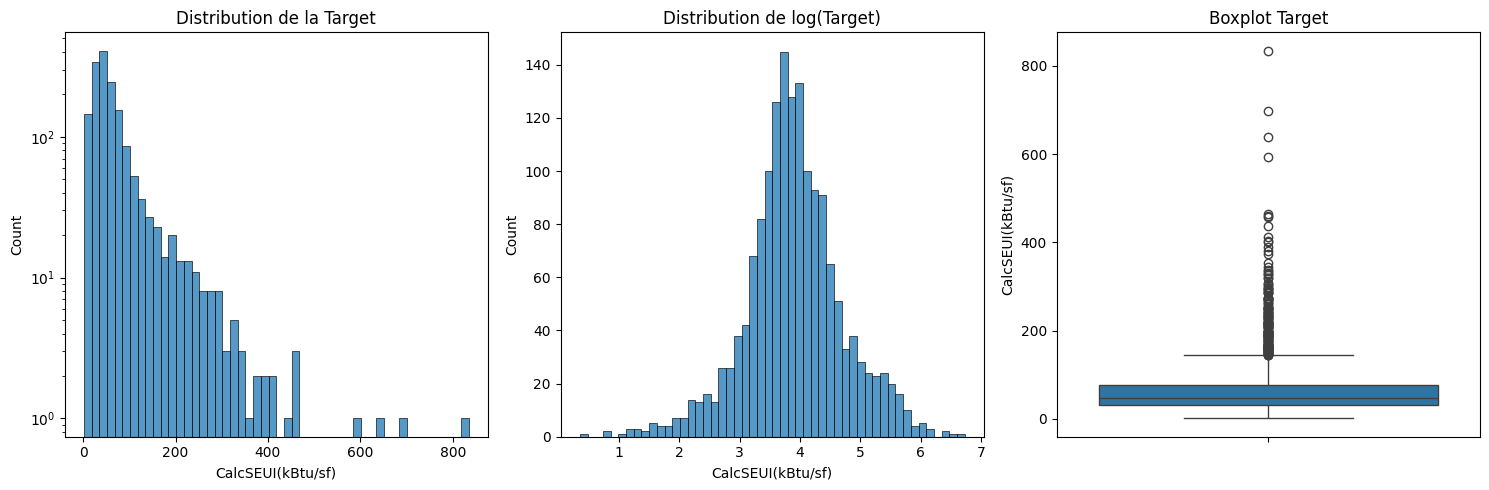

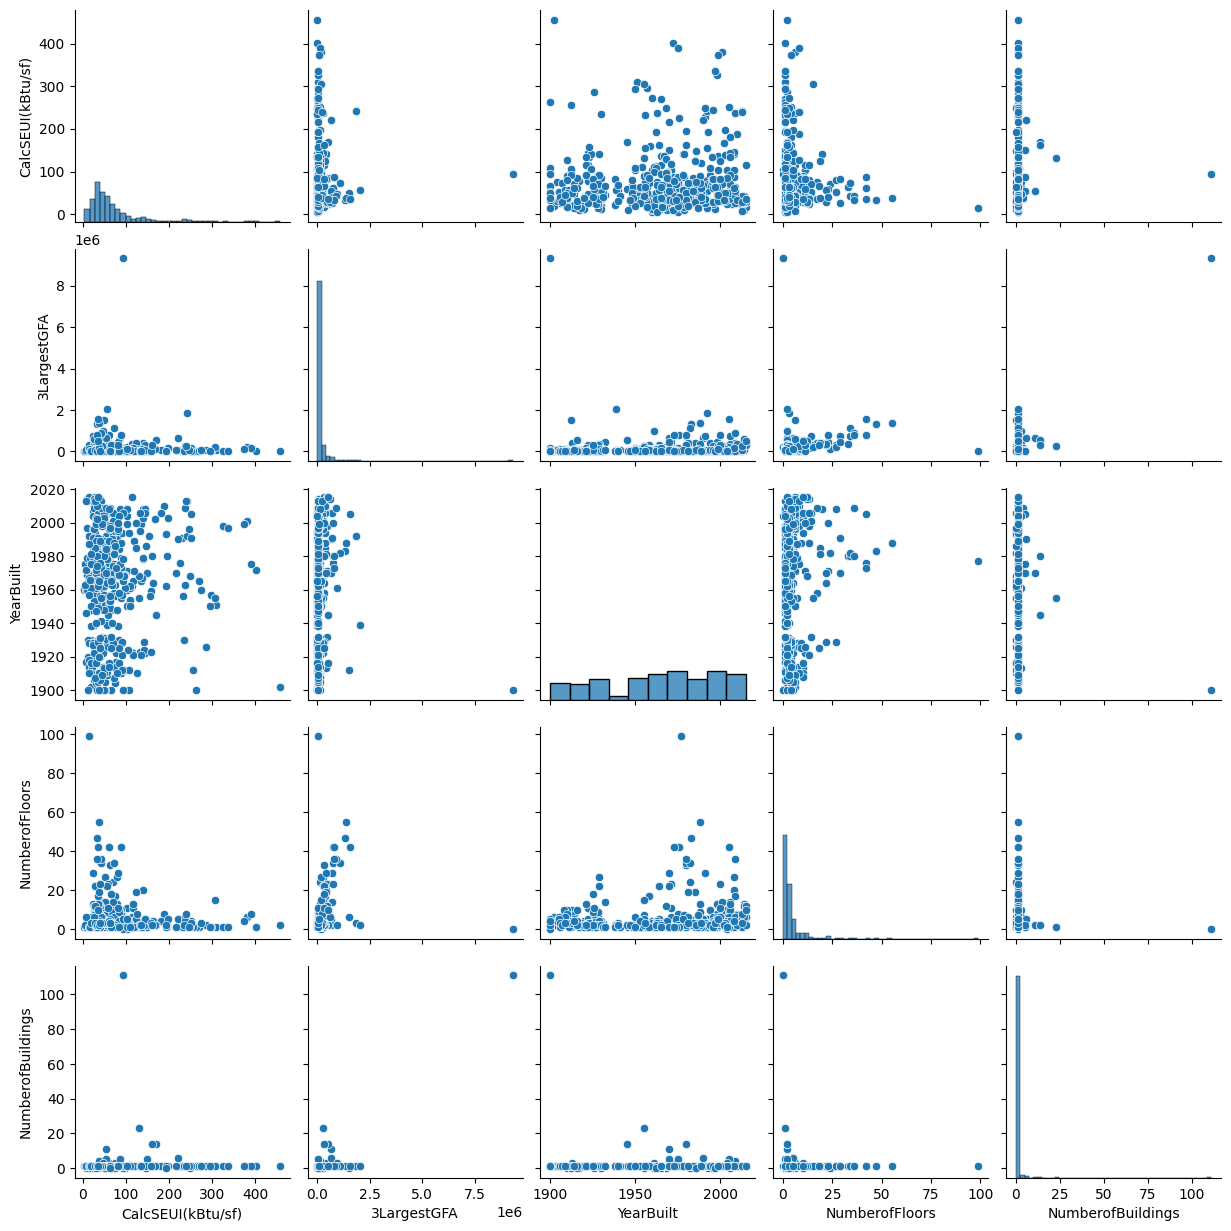

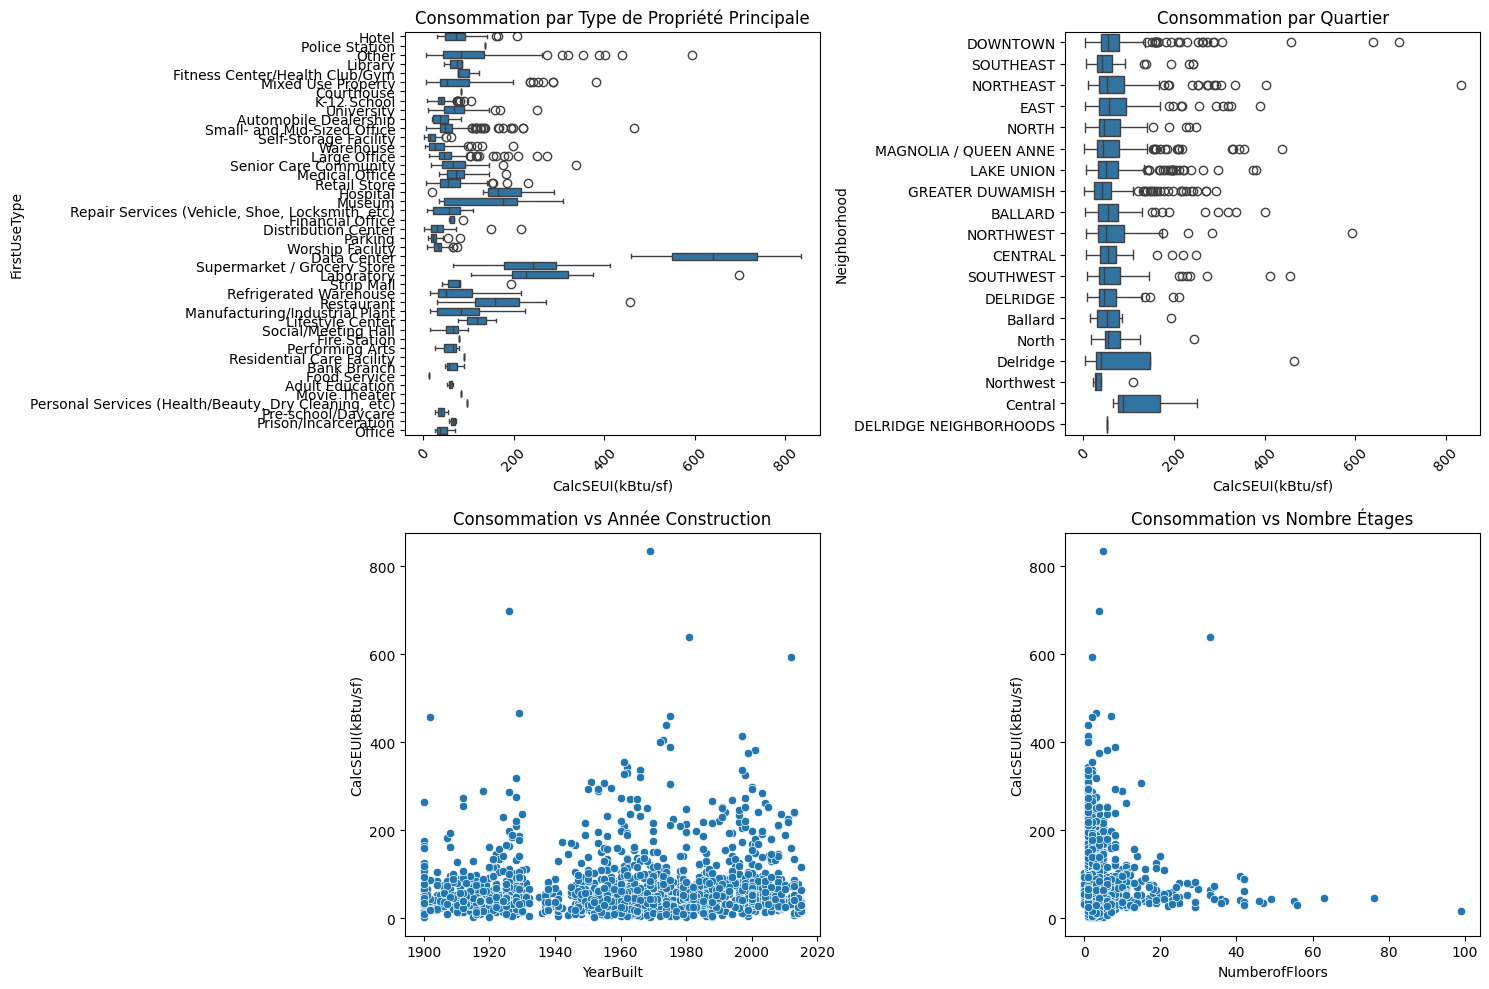

In [26]:
# Choix de 3LargestGFA comme predicteur surface pour l'efficacité
### Analyses supplémentaires EDA
bc_with_target['CalcSEUI(kBtu/sf)'] = bc_with_target['SiteEnergyUse(kBtu)'] / bc_with_target['3LargestGFA']
efficiency_target = 'CalcSEUI(kBtu/sf)'
# 1. Distribution de la target
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(bc_with_target[efficiency_target], bins=50)
plt.title('Distribution de la Target')
plt.yscale('log')  # échelle log car distribution très étalée

plt.subplot(1, 3, 2)
sns.histplot(np.log(bc_with_target[efficiency_target]), bins=50)
plt.title('Distribution de log(Target)')

plt.subplot(1, 3, 3)
sns.boxplot(y=bc_with_target[efficiency_target])
plt.title('Boxplot Target')
plt.tight_layout()
plt.show()

# 2. Pairplot pour variables numériques continues
continuous_vars = [efficiency_target, '3LargestGFA', 'YearBuilt', 
                   'NumberofFloors', 'NumberofBuildings']
sns.pairplot(bc_with_target[continuous_vars].sample(500))  # échantillon pour performance
plt.show()

# 3. Relations target vs features catégorielles importantes
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

# BoxPlots pour relations catégorielles/target
sns.boxplot(data=bc_with_target, y='FirstUseType', 
            x=efficiency_target, ax=axes[0])
axes[0].tick_params(axis='x', rotation=45)
axes[0].set_title('Consommation par Type de Propriété Principale')

sns.boxplot(data=bc_with_target, y='Neighborhood', 
            x=efficiency_target, ax=axes[1])
axes[1].tick_params(axis='x', rotation=45)
axes[1].set_title('Consommation par Quartier')

# Relations numériques/target
sns.scatterplot(data=bc_with_target, x='YearBuilt', 
                y=efficiency_target, ax=axes[2])
axes[2].set_title('Consommation vs Année Construction')

sns.scatterplot(data=bc_with_target, x='NumberofFloors', 
                y=efficiency_target, ax=axes[3])
axes[3].set_title('Consommation vs Nombre Étages')

plt.tight_layout()
plt.show()


#### Traitement des outliers de performances

In [27]:
mask = (bc_with_target['CalcSEUI(kBtu/sf)'] < 5) | (bc_with_target['CalcSEUI(kBtu/sf)']>400)
bc_with_target[mask][['CalcSEUI(kBtu/sf)', 'PrimaryPropertyType', 'FirstUseType', 'YearBuilt','Neighborhood', 'PropertyGFATotal','SecondLargestPropertyUseTypeGFA','3LargestGFA','ComplianceStatus']].sort_values('CalcSEUI(kBtu/sf)')

,CalcSEUI(kBtu/sf),PrimaryPropertyType,FirstUseType,YearBuilt,Neighborhood,PropertyGFATotal,SecondLargestPropertyUseTypeGFA,3LargestGFA,ComplianceStatus
1577,1.430046,Self-Storage Facility,Self-Storage Facility,1915,MAGNOLIA / QUEEN ANNE,39952,NaN,39952.0,Compliant
595,2.115986,Distribution Center,Distribution Center,1969,GREATER DUWAMISH,71718,NaN,71718.0,Compliant
2246,2.304459,Distribution Center,Distribution Center,1952,GREATER DUWAMISH,16300,NaN,65164.0,Compliant
974,3.018623,Warehouse,Warehouse,1900,DOWNTOWN,33300,6000.0,30000.0,Compliant
1576,3.152422,Self-Storage Facility,Self-Storage Facility,1980,MAGNOLIA / QUEEN ANNE,30989,NaN,30989.0,Compliant
380,3.346921,Self-Storage Facility,Self-Storage Facility,1988,MAGNOLIA / QUEEN ANNE,130293,8800.0,139093.0,Compliant
3009,3.459713,Warehouse,Warehouse,1920,EAST,23040,NaN,23040.0,Compliant
609,3.529496,Warehouse,Warehouse,1966,Delridge,170632,5826.0,170632.0,Compliant
378,3.598461,Warehouse,Warehouse,1941,BALLARD,63240,NaN,63240.0,Compliant
1658,3.826589,Self-Storage Facility,Self-Storage Facility,1977,NORTH,33344,984.0,32344.0,Compliant


#### Traitement de l'année de construction

In [28]:
# On regarde le nombre de valeurs manquantes par colonne ainsi que leur type 
phy_cols = ['YearBuilt', 'NumberofFloors', 'NumberofBuildings']
bc_with_target[phy_cols].info()

<class 'pandas.core.frame.DataFrame'>
Index: 1641 entries, 0 to 3375
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   YearBuilt          1641 non-null   int64  
 1   NumberofFloors     1641 non-null   int64  
 2   NumberofBuildings  1641 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 51.3 KB


In [29]:
bc_with_target['YearBuilt'].describe()

count    1641.000000
mean     1962.563681
std        32.506356
min      1900.000000
25%      1931.000000
50%      1966.000000
75%      1989.000000
max      2015.000000
Name: YearBuilt, dtype: float64

In [30]:
mask = (bc_with_target['NumberofBuildings'] < 1) 
bc_with_target[mask][phy_cols]

,YearBuilt,NumberofFloors,NumberofBuildings
63,1965,3,0.0
76,1986,2,0.0
160,1916,4,0.0
201,1968,3,0.0
241,1961,5,0.0
264,1970,1,0.0
278,1926,10,0.0
280,1973,19,0.0
291,1996,4,0.0
358,1955,1,0.0


In [31]:
bc_with_target.loc[mask,'NumberofBuildings']=1
mask = (bc_with_target['NumberofFloors'] < 1) 
bc_with_target[mask][phy_cols]

,YearBuilt,NumberofFloors,NumberofBuildings
166,1999,0,1.0
487,2004,0,1.0
488,2006,0,1.0
564,1999,0,1.0
1754,1945,0,1.0
1993,1991,0,10.0
3130,1940,0,1.0
3131,1960,0,1.0
3132,1960,0,1.0
3168,1929,0,8.0


## Traitement des variables de Géolocalisation :   
    Latitude, Longitude, Neighborhood, CouncilDistrictCode 

In [32]:
geo_col = ['Latitude', 'Longitude', 'Neighborhood', 'CouncilDistrictCode'] 
bc_with_target[geo_col].info()

<class 'pandas.core.frame.DataFrame'>
Index: 1641 entries, 0 to 3375
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Latitude             1641 non-null   float64
 1   Longitude            1641 non-null   float64
 2   Neighborhood         1641 non-null   object 
 3   CouncilDistrictCode  1641 non-null   int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 64.1+ KB


<Axes: ylabel='Longitude'>

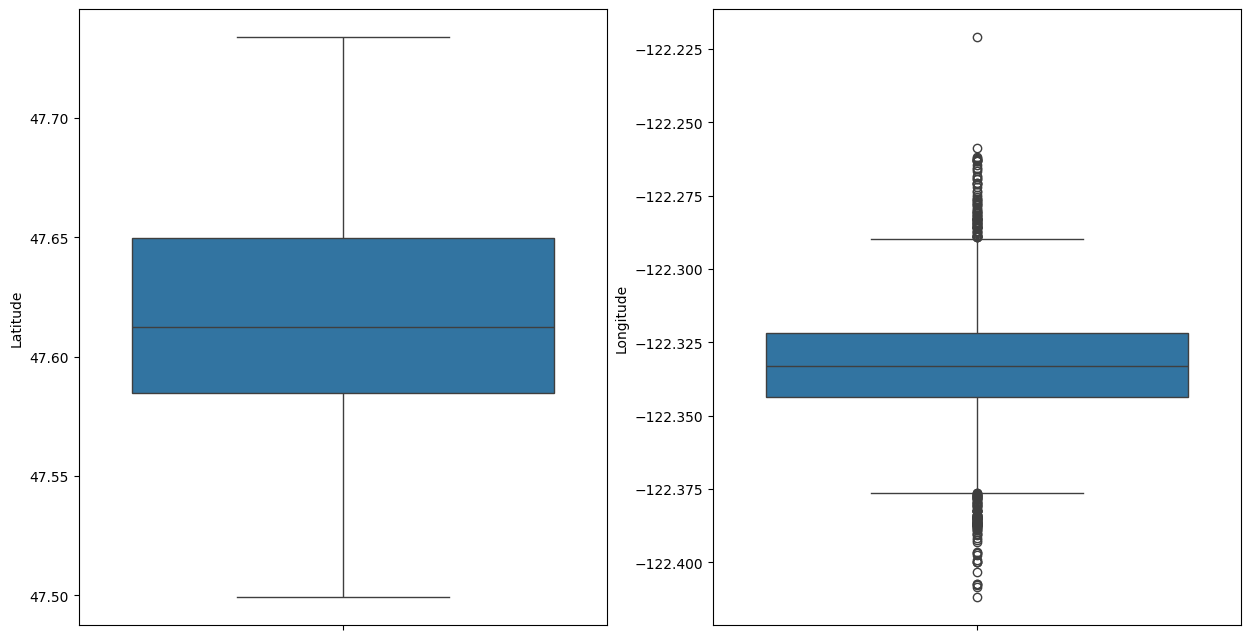

In [33]:
fig,ax = plt.subplots(1,2,figsize=(15,8))
sns.boxplot(bc_with_target['Latitude'], ax=ax[0])
sns.boxplot(bc_with_target['Longitude'], ax=ax[1])


In [34]:
bc_with_target['Neighborhood'] = bc_with_target['Neighborhood'].str.upper()
bc_with_target['Neighborhood'].value_counts()

Neighborhood
DOWNTOWN                  351
GREATER DUWAMISH          342
MAGNOLIA / QUEEN ANNE     150
LAKE UNION                145
EAST                      118
NORTHEAST                 112
NORTHWEST                  90
NORTH                      73
BALLARD                    70
CENTRAL                    54
SOUTHEAST                  47
DELRIDGE                   47
SOUTHWEST                  41
DELRIDGE NEIGHBORHOODS      1
Name: count, dtype: int64

In [35]:
bc_with_target['CouncilDistrictCode'].value_counts()

CouncilDistrictCode
7    519
2    394
3    197
4    155
5    138
1    120
6    118
Name: count, dtype: int64

In [37]:
select_columns = ['3LargestGFA', 'ListOfAllPropertyUseTypes', 'FirstUseType', 'SecondLargestPropertyUseType', 'YearBuilt', 'NumberofFloors', 'NumberofBuildings','Latitude', 'Longitude', 'Neighborhood',
                                     'SiteEnergyUse(kBtu)', 'Electricity(kBtu)', 'NaturalGas(kBtu)', 'SteamUse(kBtu)','SiteEUI(kBtu/sf)']
bc_after_eda = bc_with_target[select_columns]
bc_after_eda.to_csv("data/bc_after_eda.csv")